In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 16,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

In [287]:
rawdata1=pd.read_csv("auction_nps (accessed 2018-08-14).csv")
rawdata2=pd.read_csv("auction_nps (accessed 2018-08-14)(1).csv")
rawdata3=pd.read_csv("auction_nps (accessed 2018-08-16)(2).csv")
rawdata=pd.concat([rawdata1,rawdata2,rawdata3])

In [288]:
rawdata.shape

(200, 75)

In [289]:
def player_b2c(rawdata,player_code):
    n_players=1
    n_periods=3
    n_rounds=rawdata['participant._round_number'].values.tolist()[0]
    participant_data=rawdata[rawdata['participant.code']==player_code]
    bids=np.zeros((n_players*int(n_rounds/4),n_periods))
    b2c=np.zeros((n_players*int(n_rounds/4),n_periods))
    p2c=np.zeros((n_players*int(n_rounds/4),n_periods))
    r=np.zeros((n_players*int(n_rounds/4),n_periods))
    j=0
    for i in range(n_rounds):
        subsessiondata=participant_data[participant_data['subsession.round_number']==i+1]
        if len(subsessiondata['player.all_bids'].values.tolist())>0:
            round_bids=subsessiondata['player.all_bids'].values.tolist()[0]
            round_bids=round_bids.split(",")
            bids[j,:]=[float(k) for k in round_bids]
            b2c[j,:]=np.array(bids[j,:])/subsessiondata['player.cost'].values.tolist()[0] # bid to cost ratio
            profit=np.array([subsessiondata['player.profit1'].values.tolist()[0],subsessiondata['player.profit2'].values.tolist()[0],subsessiondata['player.profit3'].values.tolist()[0]])
            result=np.array([subsessiondata['player.result1'].values.tolist()[0],subsessiondata['player.result2'].values.tolist()[0],subsessiondata['player.result3'].values.tolist()[0]])
            p2c[j,:]= profit#/subsessiondata['player.cost'].values.tolist()[0] # profit to cost ratio
            r[j,:]=result
            j=j+1
    return b2c,p2c,r

def player_behavior(rawdata,player_code):
    lc_treat0=player_data(rawdata,'low_cost',0,player_code)
    lc_treat1=player_data(rawdata,'low_cost',1,player_code)
    hc_treat0=player_data(rawdata,'high_cost',0,player_code)
    hc_treat1=player_data(rawdata,'high_cost',1,player_code)
    return lc_treat0,lc_treat1,hc_treat0,hc_treat1

def player_data(playerdata,cost_role,treatment_type,player_code):
    cost_data=playerdata[playerdata['player.cost_role']==cost_role]
    cost_treatment_data=player_treatment(cost_data,treatment_type)
    b2c,p2c,r=player_b2c(cost_treatment_data,player_code)
    return b2c,p2c,r

def player_treatment(rawdata,treatment_type):
    treatment_data=rawdata[rawdata['subsession.treatment']==treatment_type]
    return treatment_data

codes=rawdata['participant.code'].value_counts().index
for i,code in enumerate(codes):
    lc_treat0,lc_treat1,hc_treat0,hc_treat1=player_behavior(rawdata,code)
    if i==0:
        data1=lc_treat0[0]
        data2=lc_treat1[0]
        data3=hc_treat0[0]
        data4=hc_treat1[0]
        profit1=lc_treat0[1];result1=lc_treat0[2]
        profit2=lc_treat1[1];result2=lc_treat1[2]
        profit3=hc_treat0[1];result3=hc_treat0[2]
        profit4=hc_treat1[1];result4=hc_treat1[2]
        data1_diff=np.diff(lc_treat0[0])
        data2_diff=np.diff(lc_treat1[0])
        data3_diff=np.diff(hc_treat0[0])
        data4_diff=np.diff(hc_treat1[0])
        
    else:
        data1=np.vstack([data1,lc_treat0[0]])
        data2=np.vstack([data2,lc_treat1[0]])
        data3=np.vstack([data3,hc_treat0[0]])
        data4=np.vstack([data4,hc_treat1[0]])
        profit1=np.vstack([profit1,lc_treat0[1]]);result1=np.vstack([result1,lc_treat0[2]])
        profit2=np.vstack([profit2,lc_treat1[1]]);result2=np.vstack([result2,lc_treat1[2]])
        profit3=np.vstack([profit3,hc_treat0[1]]);result3=np.vstack([result3,hc_treat0[2]])
        profit4=np.vstack([profit4,hc_treat1[1]]);result4=np.vstack([result4,hc_treat1[2]])
        data1_diff=np.vstack([data1_diff,np.diff(lc_treat0[0])])
        data2_diff=np.vstack([data2_diff,np.diff(lc_treat1[0])])
        data3_diff=np.vstack([data3_diff,np.diff(hc_treat0[0])])
        data4_diff=np.vstack([data4_diff,np.diff(hc_treat1[0])])
        

In [290]:
print(len(data1))

50


## Plots

In [291]:
def plotter(data,periods=3,y_label='Bid to cost ratio'):
    fig,ax=plt.subplots(2,2,figsize=(20,15),sharex=True,sharey=True)
    ax[0,0].plot(data[0].T)
    ax[0,0].set_title('Low Cost-Treatment 0')
    if periods==3: ax[0,0].set_xlabel('Number of periods')
    ax[0,0].set_ylabel(y_label)
    ax[0,0].yaxis.grid(True)

    ax[0,1].plot(data[1].T)
    ax[0,1].set_title('Low Cost-Treatment 1')
    if periods==3: ax[0,1].set_xlabel('Number of periods')
    ax[0,1].set_ylabel(y_label)
    ax[0,1].yaxis.grid(True)

    ax[1,0].plot(data[2].T)
    ax[1,0].set_title('High Cost-Treatment 0')
    if periods==3: ax[1,0].set_xlabel('Number of periods')
    ax[1,0].set_ylabel(y_label)
    ax[1,0].yaxis.grid(True)

    ax[1,1].plot(data[3].T)
    ax[1,1].set_title('High Cost-Treatment 1')
    if periods==3: ax[1,1].set_xlabel('Number of periods')
    ax[1,1].set_ylabel(y_label)
    ax[1,1].yaxis.grid(True)

    plt.show()
    return

In [330]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def boxplotter(data,result, split_winloss=False, top=2,periods=3, x_label='Period $i$', y_label='Bid to cost ratio'):
    fig,ax=plt.subplots(1,4,figsize=(14,3),sharex=True,sharey=True)
    if split_winloss:
        temp_w=[data[0][:,i][result[0][:,i]==1] for i in range(periods)]
        temp_l=[data[0][:,i][result[0][:,i]==0] for i in range(periods)]
        bpr=ax[0].boxplot(temp_w, positions=np.array(range(1,periods+1))-0.15)
        bpk=ax[0].boxplot(temp_l, positions=np.array(range(1,periods+1))+0.15)
        set_box_color(bpk, '#2C7BB6'); set_box_color(bpr, '#D7191C')
    else:
        ax[0].boxplot(data[0],showmeans=True)
    ax[0].set_title('Low Cost-Revelation')
    ax[0].set_ylabel(y_label)
    ax[0].yaxis.grid(True)
    ax[0].set_xlabel(x_label)
    ax[0].set_xlim([0.5, periods+0.5])
#     for i in range(periods):
#         ax[0,0].text(i+1, top, str(np.around(np.median(temp[i]),2)),horizontalalignment='center', size='x-large')

    if split_winloss:
        temp_w=[data[1][:,i][result[0][:,i]==1] for i in range(periods)]
        temp_l=[data[1][:,i][result[0][:,i]==0] for i in range(periods)]
        bpr=ax[1].boxplot(temp_w, positions=np.array(range(1,periods+1))-0.15)
        bpk=ax[1].boxplot(temp_l, positions=np.array(range(1,periods+1))+0.15)
        set_box_color(bpk, '#2C7BB6'); set_box_color(bpr, '#D7191C')
    else:
        ax[1].boxplot(data[1],showmeans=True)
    ax[1].set_title('Low Cost-No Revelation')
    ax[1].set_ylabel(y_label)
    ax[1].yaxis.grid(True)
    ax[1].set_xlabel(x_label)
    ax[1].set_xlim([0.5, periods+0.5])
#     for i in range(periods):
#         ax[0,1].text(i+1, top , str(np.around(np.median(temp[i]),2)),horizontalalignment='center', size='x-large')

    if split_winloss:
        temp_w=[data[2][:,i][result[0][:,i]==1] for i in range(periods)]
        temp_l=[data[2][:,i][result[0][:,i]==0] for i in range(periods)]
        bpr=ax[2].boxplot(temp_w, positions=np.array(range(1,periods+1))-0.15)
        bpk=ax[2].boxplot(temp_l, positions=np.array(range(1,periods+1))+0.15)
        set_box_color(bpk, '#2C7BB6'); set_box_color(bpr, '#D7191C')
    else:
        ax[2].boxplot(data[2],showmeans=True)
    ax[2].set_title('High Cost-Revelation')
    ax[2].set_ylabel(y_label)
    ax[2].set_xlabel(x_label)
    ax[2].yaxis.grid(True)
    ax[2].set_xlim([0.5, periods+0.5])
#     for i in range(periods):
#         ax[1,0].text(i+1, top , str(np.around(np.median(temp[i]),2)),horizontalalignment='center', size='x-large')

    if split_winloss:
        temp_w=[data[3][:,i][result[0][:,i]==1] for i in range(periods)]
        temp_l=[data[3][:,i][result[0][:,i]==0] for i in range(periods)]
        bpr=ax[3].boxplot(temp_w, positions=np.array(range(1,periods+1))-0.15)
        bpk=ax[3].boxplot(temp_l, positions=np.array(range(1,periods+1))+0.15)
        set_box_color(bpk, '#2C7BB6'); set_box_color(bpr, '#D7191C')
    else:
        ax[3].boxplot(data[3],showmeans=True)
    ax[3].set_title('High Cost-No Revelation')
    plt.xticks(range(1,periods+1), range(1,periods+1))
    ax[3].set_ylabel(y_label)
    ax[3].set_xlabel(x_label)
    ax[3].yaxis.grid(True)
    ax[3].set_xlim([0.5, periods+0.5])
#     for i in range(periods):
#         ax[1,1].text(i+1, top, str(np.around(np.median(temp[i]),2)),horizontalalignment='center', size='x-large')

    return

## Bid 2 cost Ratio

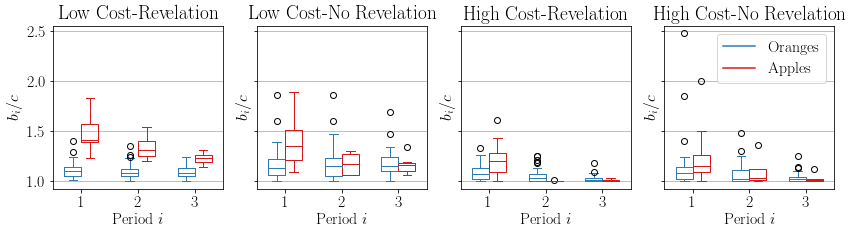

Ttest_indResult(statistic=-1.1493927784972386, pvalue=0.27110163275416543)
Ttest_indResult(statistic=-2.0572327103024413, pvalue=0.042320038873272209)


In [332]:
# plotter([data1,data2,data3,data4])
boxplotter([data1,data2,data3,data4], result=[result1,result2,result3,result4], split_winloss=True, y_label='$b_i/c$')
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()
plt.show()
print(stats.ttest_ind(data3[:,2][result3[:,2]==1], data4[:,2][result4[:,2]==1]))
winbid_R = np.hstack([data1[:,2][result1[:,2]==1], data3[:,2][result3[:,2]==1]])
winbid_NR = np.hstack([data2[:,2][result2[:,2]==1], data4[:,2][result4[:,2]==1]])
print(stats.ttest_ind(winbid_R, winbid_NR))

## Profit

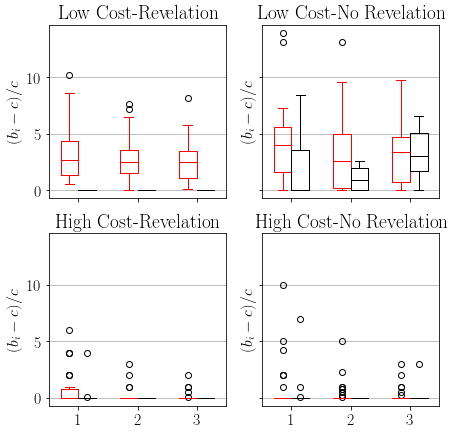

In [294]:
# plotter([profit1,profit2,profit3,profit4],y_label='profit')
# boxplotter([profit1,profit2,profit3,profit4],y_label='profit',top=0.8)
boxplotter([profit1,profit2,profit3,profit4], result=[result1,result2,result3,result4], split_winloss=True, y_label='$(b_i-c)/c$')

## Gradient in Bid to Cost Ratio

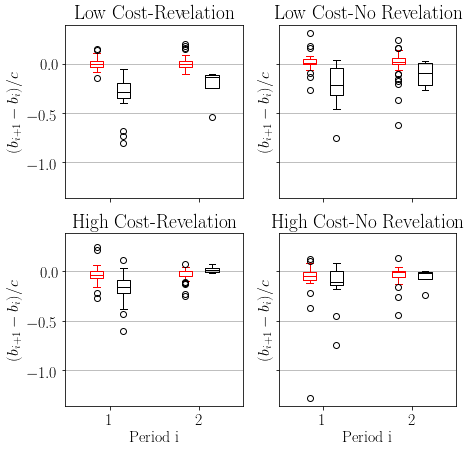

In [302]:
# print(data1_diff[result1[:,:2]==1])
# plotter([data1_diff,data2_diff,data3_diff,data4_diff],periods=2)
boxplotter([data1_diff,data2_diff,data3_diff,data4_diff],\
           result=[result1[:,:2],result2[:,:2],result3[:,:2],result4[:,:2]], split_winloss=True, x_label='Period i', y_label='$(b_{i+1}-b_i)/c$', top=0.01,periods=2)

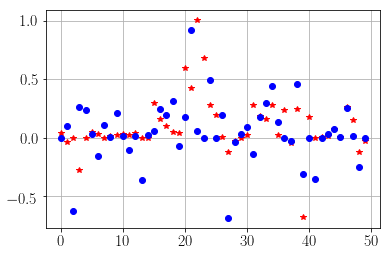

In [296]:
plt.plot(np.diff(data1_diff),'*r')
plt.plot(np.diff(data2_diff),'bo')
plt.grid(True)
plt.show()
# print(np.sum(np.diff(data1_diff)<0))
# print(np.sum(np.diff(data2_diff)<0))

In [297]:
print(profit1.shape)
print(40-np.count_nonzero(profit1[:,2]))
print(40-np.count_nonzero(profit2[:,2]))

(50, 3)
-4
-1


In [298]:
stats.ttest_ind(data4[:,2][result4[:,2]==1], data3[:,2][result3[:,2]==1])

Ttest_indResult(statistic=1.1493927784972386, pvalue=0.27110163275416543)

In [299]:
from scipy import stats
stats.ttest_ind(data2_diff[:,1][result2[:,1]==1], data1_diff[:,1][result1[:,1]==1])

Ttest_indResult(statistic=2.8817320278960339, pvalue=0.0050193425848936313)

In [104]:
# n_rounds=rawdata['participant._round_number'].values.tolist()[0]
# n_players=4
# n_periods=3
# bids=np.zeros((n_players*n_rounds,n_periods))
# for i in range(n_rounds):
#     subsessiondata=rawdata[rawdata['subsession.round_number']==i+1]
#     for j in range(n_periods):
#         bids[n_players*i,j]=subsessiondata[subsessiondata['player.cost_role']=='low_cost']['player.bid'+str(j+1)].values.tolist()[0]/(subsessiondata[subsessiondata['player.cost_role']=='high_cost']['player.cost'].values.tolist()[0])
#         bids[n_players*i+1,j]=subsessiondata[subsessiondata['player.cost_role']=='low_cost']['player.opponent_bid'+str(j+1)].values.tolist()[0]/(subsessiondata[subsessiondata['player.cost_role']=='high_cost']['player.cost'].values.tolist()[0])
# bids

In [105]:
# fig,ax=plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
# cmap=['r','g','b','y','m','k','c','r']
# k,j=0,0
# for i in range(8):
#     if i%2==0:
#         ax[0].plot(bids[i,:],linewidth=2,linestyle='dashed',color=cmap[k])
#         ax[1].plot(bids[i+8,:],linewidth=2,linestyle='dashed',color=cmap[j])
#     else:
#         ax[0].plot(bids[i,:],linewidth=2,color=cmap[k],label='round'+str(i))
#         k=k+1
#         ax[1].plot(bids[i+8,:],linewidth=2,color=cmap[j],label='round'+str(i))
#         j=j+1



# ax[0].set_title('winning bids revealed') 
# ax[1].set_title('winning bids not revealed') 
# ax[0].set_xlabel('periods')
# ax[0].set_ylabel('normalized bid')
# ax[1].set_xlabel('periods')
# ax[1].set_ylabel('normalized bid')
# ax[0].legend()
# ax[1].legend()
# plt.show()